<a href="https://colab.research.google.com/github/irislemus/challenge-Alura-Store/blob/main/Final_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


t1 = pd.read_csv(url)
t1["Tienda"] = "Tienda_1"

t2 = pd.read_csv(url2)
t2["Tienda"] = "Tienda_2"

t3 = pd.read_csv(url3)
t3["Tienda"] = "Tienda_3"

t4 = pd.read_csv(url4)
t4["Tienda"] = "Tienda_4"

df = pd.concat([t1, t2, t3, t4], ignore_index=True)

df.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda_1


In [ ]:
resumen = df.groupby("Tienda").agg(
    transacciones=("Producto", "count"),
    ingresos_totales=("Precio", "sum"),
    ingreso_promedio=("Precio", "mean"),
    calificacion_promedio=("Calificación", "mean"),
    costo_envio_promedio=("Costo de envío", "mean"),
).reset_index()
resumen

,Tienda,transacciones,ingresos_totales,ingreso_promedio,calificacion_promedio,costo_envio_promedio
0,Tienda_1,2359,1.150880e+09,487867.910131,3.976685,26018.609580
1,Tienda_2,2359,1.116344e+09,473227.426876,4.037304,25216.235693
2,Tienda_3,2359,1.098020e+09,465459.771089,4.048326,24805.680373
3,Tienda_4,2358,1.038376e+09,440362.892282,3.995759,23459.457167


#1. Análisis de facturación



In [ ]:
ingresos_por_tienda = df.groupby("Tienda")["Precio"].sum().sort_values(ascending=True).rename("Ingresos Totales")
ingresos_por_tienda

,Ingresos Totales
Tienda,
Tienda_4,1.038376e+09
Tienda_3,1.098020e+09
Tienda_2,1.116344e+09
Tienda_1,1.150880e+09


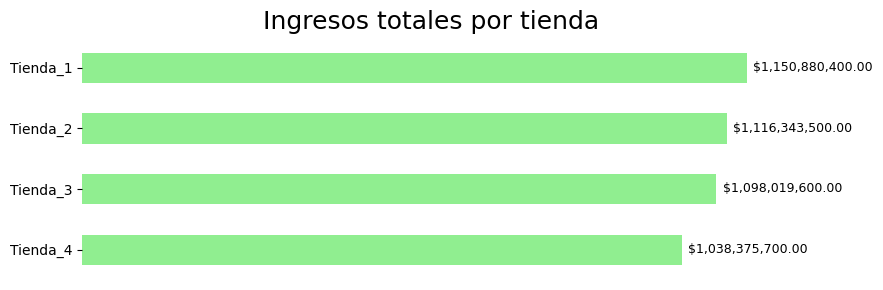

In [ ]:
plt.figure(figsize=(8,3))
ax = ingresos_por_tienda.plot(kind="barh", color="lightgreen", edgecolor="none")

plt.title("Ingresos totales por tienda", fontsize=18)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.tight_layout()
plt.box(False)

for i, valor in enumerate(ingresos_por_tienda):
    ax.text(valor + (valor * 0.01), i, f"${valor:,.2f}", va='center', fontsize=9)

plt.show()

In [ ]:
ingresos_por_producto = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
ingresos_por_producto

,Precio
Producto,
TV LED UHD 4K,432489600.0
Iphone 15,401051200.0
Refrigerador,384937400.0
Smart TV,290221800.0
Lavadora de ropa,242468600.0
Lavavajillas,240536500.0
Tablet ABXY,219012800.0
Secadora de ropa,210238000.0
Celular ABXY,157911100.0


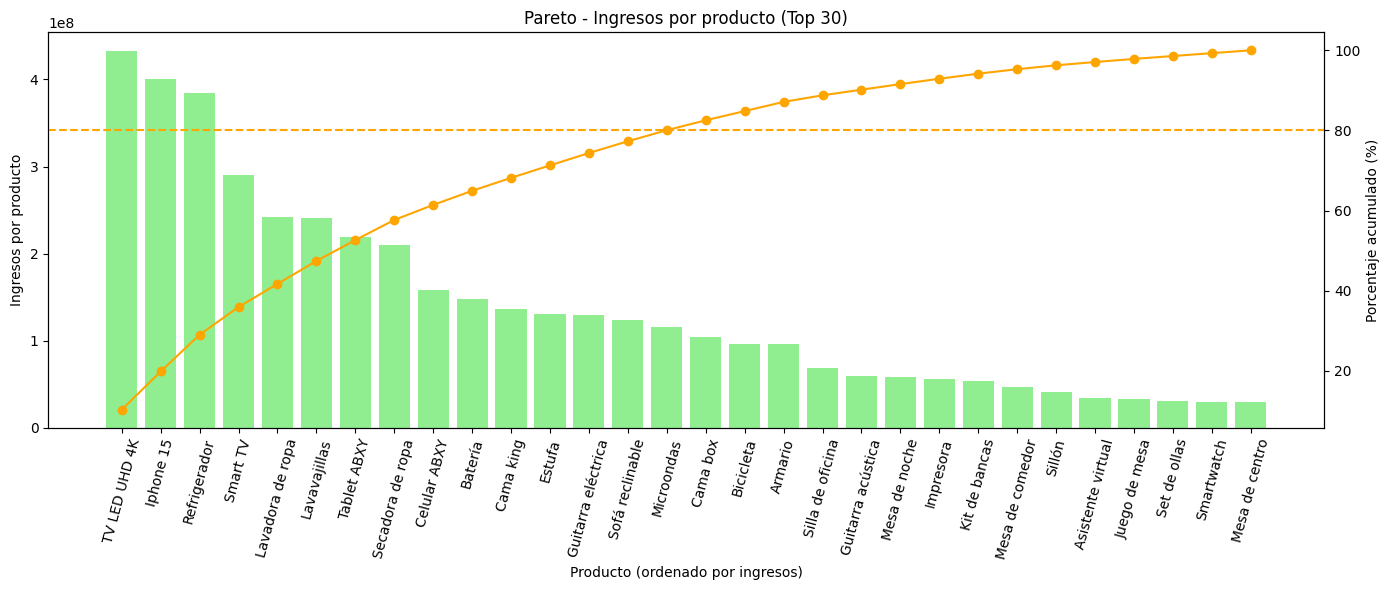

In [ ]:

top_30_productos = ingresos_por_producto.head(30)

porcentaje_acumulado = top_30_productos.cumsum() / top_30_productos.sum() * 100

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.bar(top_30_productos.index, top_30_productos.values, color='lightgreen')
ax1.set_ylabel('Ingresos por producto')
ax1.set_xlabel('Producto (ordenado por ingresos)')
ax1.tick_params(axis='x', rotation=75)

ax2 = ax1.twinx()
ax2.plot(top_30_productos.index, porcentaje_acumulado, color='orange', marker='o')
ax2.set_ylabel('Porcentaje acumulado (%)')


ax2.axhline(80, color='orange', linestyle='--')

plt.title('Pareto - Ingresos por producto (Top 30)')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
ventas_categoria = df.groupby(['Tienda','Categoría del Producto'])['Producto'].count().unstack().reset_index()
ventas_categoria

Categoría del Producto,Tienda,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
0,Tienda_1,171,284,312,448,182,324,173,465
1,Tienda_2,181,275,305,422,224,313,197,442
2,Tienda_3,177,277,278,451,177,315,185,499
3,Tienda_4,201,277,254,451,170,338,187,480


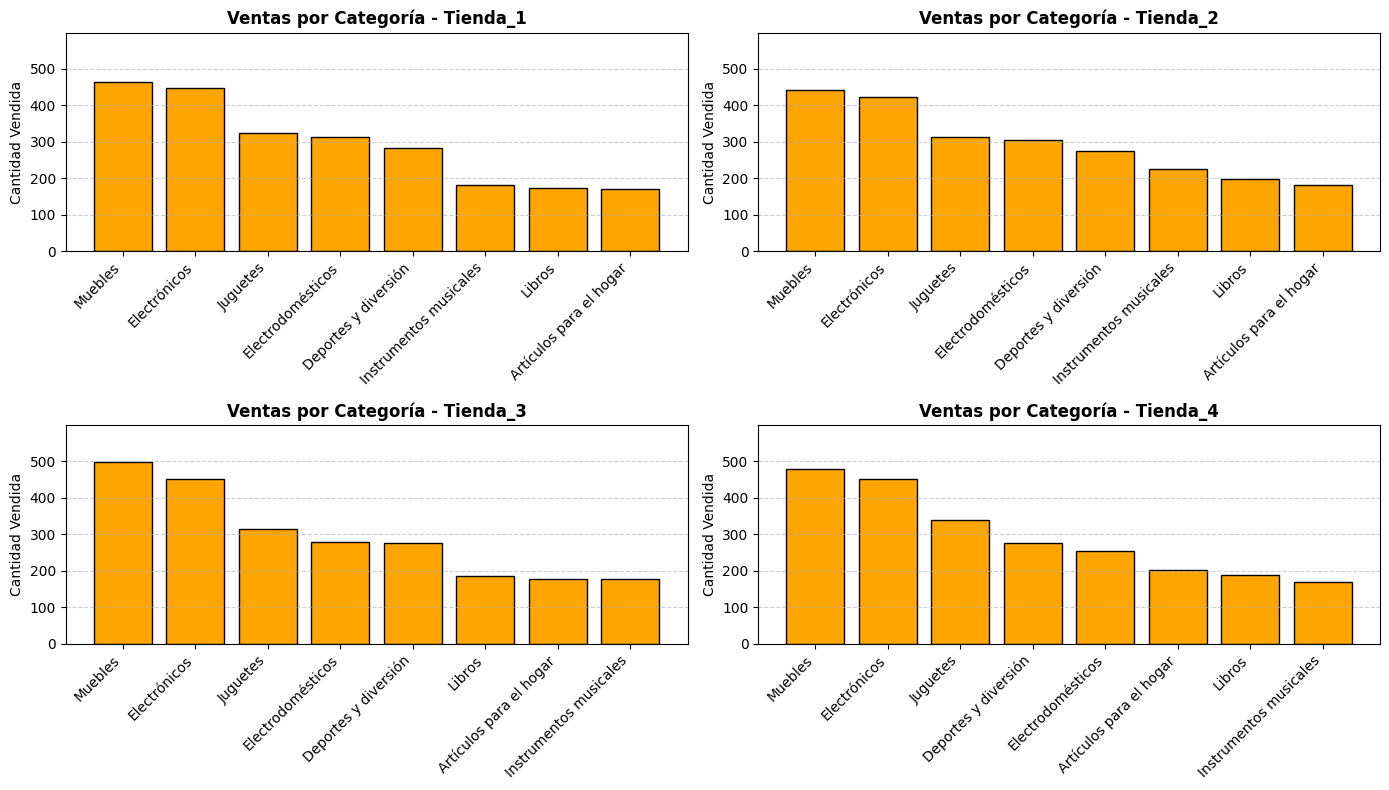

In [ ]:

ventas_categoria = (
    df.groupby(['Tienda', 'Categoría del Producto'])['Producto']
      .count()
      .reset_index(name='Cantidad Vendida')
      .sort_values(['Tienda', 'Cantidad Vendida'], ascending=[True, False])
)


fig, axes = plt.subplots(2, 2, figsize=(14, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


for i, tienda in enumerate(df['Tienda'].unique()):
    ax = axes.flatten()[i]
    datos_tienda = ventas_categoria[ventas_categoria['Tienda'] == tienda]

    ax.bar(datos_tienda['Categoría del Producto'],
           datos_tienda['Cantidad Vendida'],
           color='orange', edgecolor='black')

    ax.set_title(f'Ventas por Categoría - {tienda}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Cantidad Vendida')
    ax.set_xticks(range(len(datos_tienda)))
    ax.set_xticklabels(datos_tienda['Categoría del Producto'], rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)


max_y = ventas_categoria['Cantidad Vendida'].max() + 100
for ax in axes.flatten():
    ax.set_ylim(0, max_y)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
calificacion_prom = df.groupby("Tienda")["Calificación"].mean().sort_values(ascending=False).reset_index()
calificacion_prom

,Tienda,Calificación
0,Tienda_3,4.048326
1,Tienda_2,4.037304
2,Tienda_4,3.995759
3,Tienda_1,3.976685


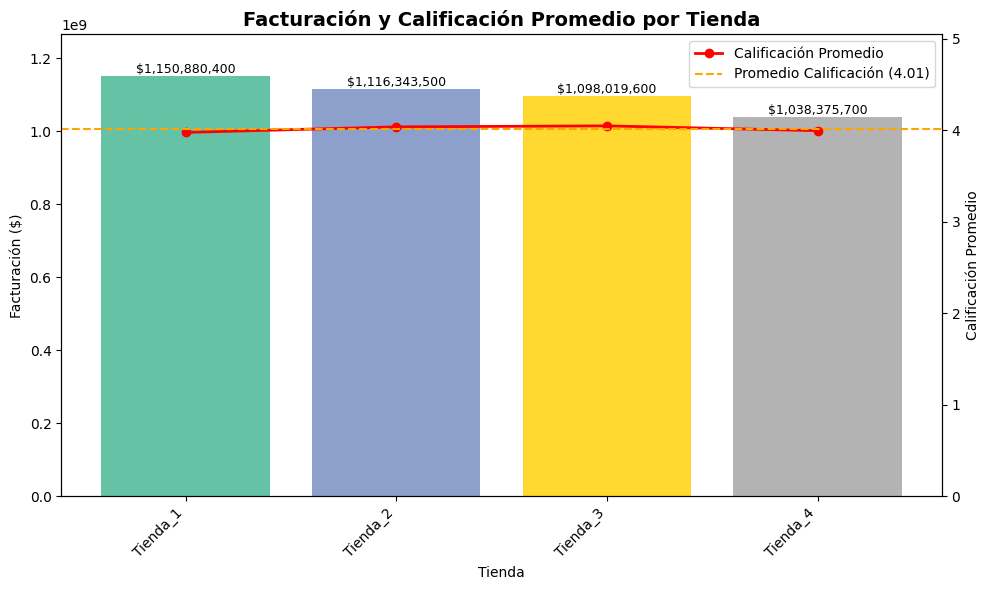

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Colores de barra usando una paleta
colors = plt.cm.Set2(np.linspace(0, 1, len(resumen)))

# Barras de facturación
bars = ax1.bar(resumen['Tienda'], resumen['ingresos_totales'], color=colors)
ax1.set_xlabel('Tienda')
ax1.set_ylabel('Facturación ($)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Etiquetas en las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f"${height:,.0f}",
             ha='center', va='bottom', fontsize=9)

# Eje secundario para calificación
ax2 = ax1.twinx()
ax2.plot(resumen['Tienda'], resumen['calificacion_promedio'],
         color='red', marker='o', linewidth=2, label='Calificación Promedio')
ax2.set_ylabel('Calificación Promedio', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Línea horizontal del promedio de calificación
promedio_calif = resumen['calificacion_promedio'].mean()
ax2.axhline(promedio_calif, color='orange', linestyle='--', linewidth=1.5,
            label=f'Promedio Calificación ({promedio_calif:.2f})')

# Ajustes finales
plt.title('Facturación y Calificación Promedio por Tienda', fontsize=14, fontweight='bold')
ax1.set_xticklabels(resumen['Tienda'], rotation=45, ha='right')
ax2.set_ylim(0, resumen['calificacion_promedio'].max() + 1)
ax1.set_ylim(0, resumen['ingresos_totales'].max() * 1.1)

# Leyenda combinada
lines_labels = [ax2.get_lines()[0], ax2.lines[1]]
labels = [l.get_label() for l in lines_labels]
ax2.legend(lines_labels, labels, loc='upper right')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
ventas_productos = df.groupby(["Tienda", "Producto"])["Producto"].count().reset_index(name="Cantidad Vendida")

for tienda, datos in ventas_productos.groupby("Tienda"):
    p_vendidos = (
        datos.sort_values(by="Cantidad Vendida", ascending=False)

             .set_index("Producto")["Cantidad Vendida"]
    )


    print(f"\n=== Tienda: {tienda} ===\n")
    display(p_vendidos)


=== Tienda: Tienda_1 ===



,Cantidad Vendida
Producto,
Armario,60
TV LED UHD 4K,60
Microondas,60
Secadora de ropa,58
Mesa de noche,56
Bloques de construcción,56
Balón de baloncesto,55
Bicicleta,54
Impresora,54



=== Tienda: Tienda_2 ===



,Cantidad Vendida
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Pandereta,58
Guitarra acústica,58
Secadora de ropa,57
Iphone 15,55
Bloques de construcción,54
Armario,54



=== Tienda: Tienda_3 ===



,Cantidad Vendida
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55
Smart TV,54
Modelado predictivo,53
Cuerda para saltar,53
Estufa,53



=== Tienda: Tienda_4 ===



,Cantidad Vendida
Producto,
Cama box,62
Cubertería,59
Cama king,56
Dashboards con Power BI,56
Carrito de control remoto,55
Mesa de noche,55
Mesa de comedor,55
Bloques de construcción,54
Smart TV,54


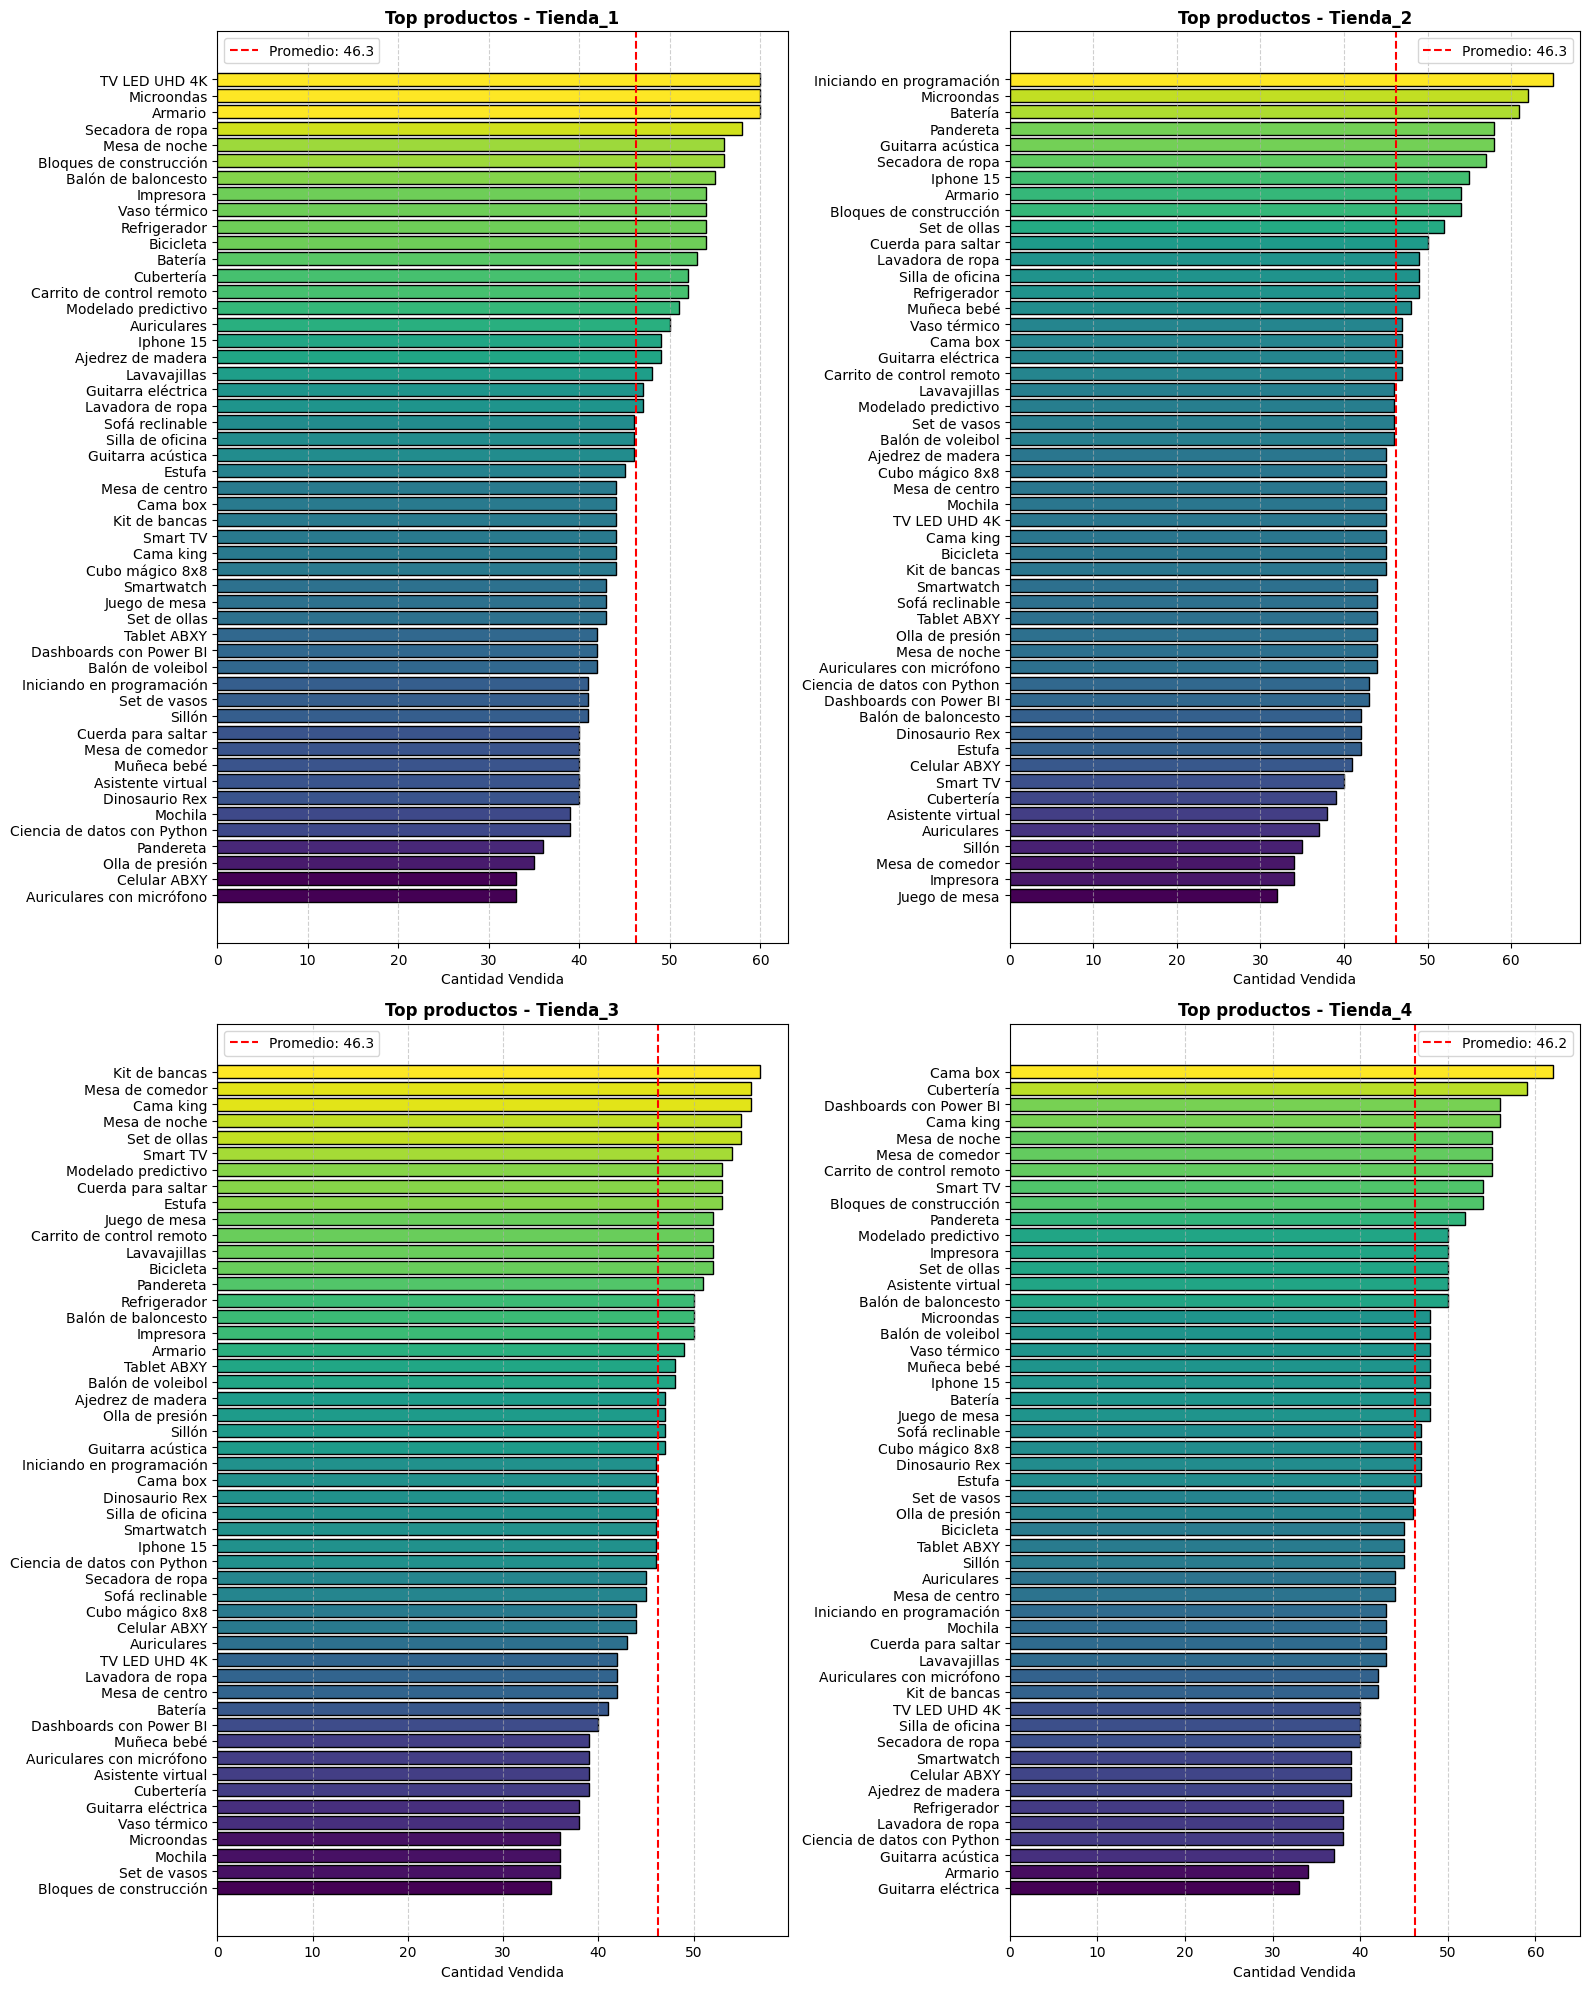

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(16, 20))
axes = axes.flatten()


for i, (tienda, datos) in enumerate(ventas_productos.groupby("Tienda")):

    p_vendidos = datos.sort_values(by="Cantidad Vendida", ascending=True)
    promedio = p_vendidos["Cantidad Vendida"].mean()


    norm = plt.Normalize(p_vendidos["Cantidad Vendida"].min(), p_vendidos["Cantidad Vendida"].max())
    colores = cm.viridis(norm(p_vendidos["Cantidad Vendida"]))


    axes[i].barh(p_vendidos["Producto"], p_vendidos["Cantidad Vendida"],
                 color=colores, edgecolor="black")


    axes[i].axvline(promedio, color="red", linestyle="--", linewidth=1.5, label=f"Promedio: {promedio:.1f}")


    axes[i].set_title(f"Top productos - {tienda}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Cantidad Vendida")
    axes[i].legend()
    axes[i].grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
costo_envio_prom = df.groupby("Tienda")["Costo de envío"].mean()
costo_envio_prom

,Costo de envío
Tienda,
Tienda_1,26018.609580
Tienda_2,25216.235693
Tienda_3,24805.680373
Tienda_4,23459.457167


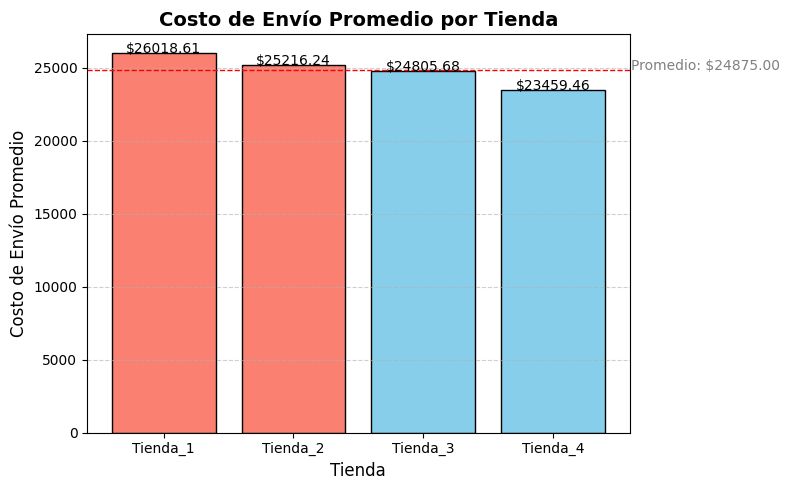

In [ ]:


promedio_general = costo_envio_prom.mean()


colores = ["salmon" if valor > promedio_general else "skyblue" for valor in costo_envio_prom.values]


plt.figure(figsize=(8, 5))
plt.bar(costo_envio_prom.index, costo_envio_prom.values,
        color=colores, edgecolor="black")


plt.title("Costo de Envío Promedio por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Costo de Envío Promedio", fontsize=12)


for i, valor in enumerate(costo_envio_prom.values):
    plt.text(i, valor + 0.1, f"${valor:.2f}", ha="center", fontsize=10)


plt.axhline(promedio_general, color="red", linestyle="--", linewidth=1)
plt.text(len(costo_envio_prom)-0.4, promedio_general + 0.1,
         f"Promedio: ${promedio_general:.2f}", color="gray", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

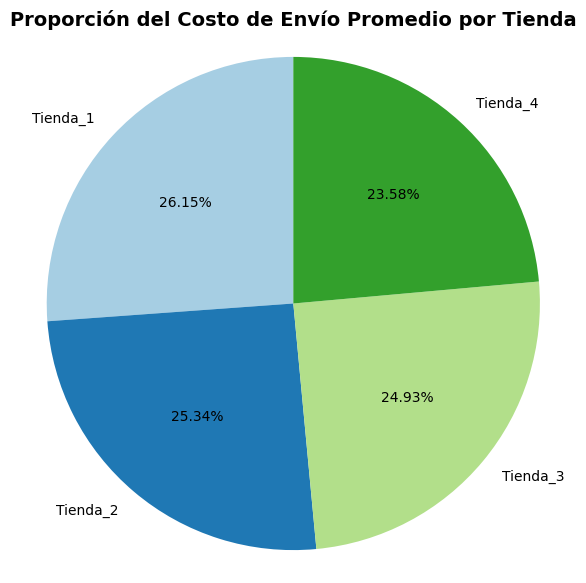

In [ ]:


plt.figure(figsize=(7,7))
plt.pie(
    costo_envio_prom,
    labels=costo_envio_prom.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)

plt.title("Proporción del Costo de Envío Promedio por Tienda", fontsize=14, fontweight="bold")
plt.axis('equal')
plt.show()

# Informe de Análisis y Recomendación para Alura Store

**Introducción**

El presente informe tiene como propósito principal asistir al Sr. Juan, propietario de la cadena de tiendas Alura Store, en la toma de decisiones estratégicas. El objetivo es identificar la tienda con el desempeño menos eficiente para su posible venta, lo que permitiría financiar un nuevo emprendimiento. Para ello, se realizó un análisis exhaustivo de datos de ventas, rendimiento, costos y reseñas de las cuatro tiendas de la cadena, utilizando una serie de gráficos que visualizan las métricas clave.

**Desarrollo y Análisis de Datos**

A continuación, se presentan los hallazgos basados en el análisis de cada gráfico, comparando el rendimiento de las cuatro tiendas:

1. Ingresos Totales por Tienda (Gráfico de Barras: "Ingresos totales por tienda")
El primer análisis se centró en la métrica más crítica: los ingresos. El gráfico de barras horizontales muestra que la Tienda 1 es la líder en facturación, con `$1,150,880,400.00.`  La Tienda 4 se posiciona claramente en el último lugar, con un ingreso total de `$1,038,375,700.00,` lo que representa una diferencia significativa con respecto a las demás tiendas. Este gráfico establece una base sólida para considerar a la Tienda 4 como la candidata principal para la venta.

2. Rendimiento por Producto (Gráfico de Pareto: "Ingresos por producto (Top 30)")
Este gráfico reveló que el 80% de los ingresos de la cadena provienen de un pequeño número de productos, como TV LED UHD 4K e iPhone 15. Aunque este gráfico no compara directamente las tiendas, nos da un contexto crucial: para ser rentable, una tienda debe vender un alto volumen de estos artículos de gran valor.

3. Ventas por Categoría (Gráfico de Barras Múltiples: "Ventas por Categoría")
Al examinar las ventas por categoría en cada tienda, se encontró que el patrón de consumo es similar en toda la cadena, con "Muebles", "Electrónicos" y "Juguetes" como las categorías más vendidas. Sin embargo, una inspección detallada muestra que la Tienda 4 vende una menor cantidad de productos en estas categorías principales en comparación con las otras tiendas, lo que explica su bajo rendimiento en ingresos.

4. Cantidad de Unidades Vendidas (Gráfico de Barras: "Top products")
Este gráfico confirmó que la Tienda 4 tiene un volumen de ventas más bajo en general. Si bien las tiendas venden los mismos productos, la cantidad de unidades vendidas de los artículos más populares es menor en la Tienda 4. Esto refuerza la idea de que la tienda no está logrando convertir el potencial de ventas de los productos estrella, lo que afecta directamente su facturación.

5. Facturación y Calificación Promedio (Gráfico Combinado)
Este gráfico es una síntesis poderosa de las dos métricas más importantes. En él se observa claramente que la Tienda 4 no solo tiene la facturación más baja, sino que también es la única tienda cuya calificación promedio está por debajo del promedio general de la cadena. Esto sugiere que sus problemas no son solo de ventas, sino que también enfrenta desafíos en la satisfacción del cliente.

6. Costo de Envío (Gráfico de Barras: "Costo de Envío Promedio" y Gráfico Circular: "Proporción del Costo de Envío Promedio")
Finalmente, el análisis de costos de envío reveló un punto positivo para la Tienda 4, ya que tiene el costo de envío promedio más bajo. Sin embargo, este bajo costo, aunque positivo, no logra compensar el bajo rendimiento en las métricas de ingresos y satisfacción del cliente. La eficiencia en una sola área no es suficiente para justificar su continuidad.

**Conclusión y Recomendación Final**

Después de un análisis exhaustivo y sistemático de todos los datos proporcionados, la conclusión es contundente y clara:

La Tienda 4 es la tienda menos eficiente de la cadena Alura Store y, por lo tanto, se recomienda su venta.

La justificación de esta decisión se basa en una combinación de factores interconectados:

* Rendimiento Financiero Deficiente: La Tienda 4 presenta la facturación total más baja y el ingreso promedio por transacción más bajo, lo que la convierte en el activo de menor valor de la cadena.

* Problemas de Satisfacción del Cliente: Su calificación promedio es la más baja, lo que indica que, además de no vender lo suficiente, podría haber problemas subyacentes en la experiencia del cliente.

* Bajo Volumen de Ventas en Productos Clave: La Tienda 4 no está capitalizando el potencial de los productos de mayor rentabilidad, lo que afecta directamente a su desempeño financiero.

Vender la Tienda 4 no solo permitiría liquidar un activo que rinde por debajo del promedio, sino que también proporcionaría el capital necesario para que el Sr. Juan inicie su nuevo emprendimiento. Esta estrategia le permitiría enfocarse en las tiendas más rentables y exitosas, fortaleciendo la salud financiera de la empresa en su conjunto.